Lectura de archivos y carga de datos

In [1]:
!git clone https://github.com/ichiP245/micrography-imgpro.git

Cloning into 'micrography-imgpro'...
remote: Enumerating objects: 114, done.
remote: Counting objects: 100% (48/48), done.
remote: Compressing objects: 100% (42/42), done.
remote: Total 114 (delta 15), reused 23 (delta 4), pack-reused 66 (from 1)
Receiving objects: 100% (114/114), 113.69 MiB | 13.77 MiB/s, done.
Resolving deltas: 100% (33/33), done.


In [2]:
import sys
sys.path.append('/content/micrography-imgpro')

# Verifica que el módulo esté en la ruta antes de intentar importarlo
print("Python path updated. Trying to import getmeresults...")

Python path updated. Trying to import getmeresults...


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
df0 = pd.read_csv('/content/micrography-imgpro/ArchivosEntrega01/df_results24.csv', index_col=0)
df2 = pd.read_csv('/content/micrography-imgpro/ArchivosEntrega01/df_results25cercano.csv', index_col=0)

In [11]:
df0.columns, df2.columns

(Index(['Image Paths', 'pores', 'fibers', 'resin', 'undefined', 'sumcheck',
        'Tanda'],
       dtype='object'),
 Index(['Image Paths', 'pores', 'fibers', 'resin', 'undefined', 'sumcheck',
        'Tanda'],
       dtype='object'))

In [12]:
df = pd.concat([df0, df2])
df.head()

,Image Paths,pores,fibers,resin,undefined,sumcheck,Tanda
0,/content/drive/MyDrive/Micrografía M2 31 3 20...,0.000000,29.094329,64.121528,6.784144,100.0,Tubos 2024
1,/content/drive/MyDrive/Micrografía M2 31 3 20...,1.867573,64.227527,30.862606,3.042294,100.0,Tubos 2024
2,/content/drive/MyDrive/Micrografía M2 31 3 20...,6.011863,33.776427,53.767458,6.444252,100.0,Tubos 2024
3,/content/drive/MyDrive/Micrografía M2 31 3 20...,5.026331,34.344522,54.051119,6.578029,100.0,Tubos 2024
4,/content/drive/MyDrive/Micrografía M2 31 3 20...,0.000000,30.568528,63.969811,5.461661,100.0,Tubos 2024


Comparacion de porcentajes de cada componente entre tandas

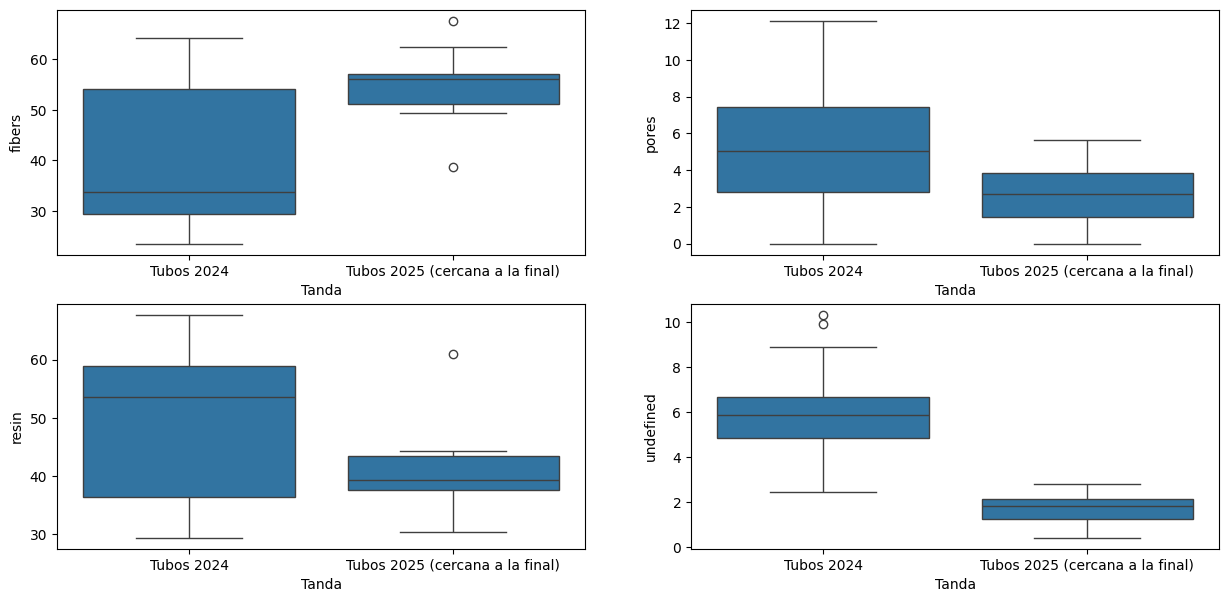

In [21]:
fig,ax = plt.subplots(2,2, figsize=(15,7))
sns.boxplot(x='Tanda', y='fibers', data=df, ax=ax[0,0])
sns.boxplot(x='Tanda', y='pores', data=df, ax=ax[0,1])
sns.boxplot(x='Tanda', y='resin', data=df, ax=ax[1,0])
sns.boxplot(x='Tanda', y='undefined', data=df, ax=ax[1,1])
plt.show()

Estadisticos de poros

In [28]:
df.groupby('Tanda')['pores'].describe()

,count,mean,std,min,25%,50%,75%,max
Tanda,,,,,,,,
Tubos 2024,47.0,4.888031,3.080947,0.000000,2.786965,5.026331,7.455946,12.119695
Tubos 2025 (cercana a la final),12.0,2.710708,1.745838,0.002411,1.447941,2.711444,3.851719,5.662423


Estadisticos de fibra

In [29]:
df.groupby('Tanda')['fibers'].describe()

,count,mean,std,min,25%,50%,75%,max
Tanda,,,,,,,,
Tubos 2024,47.0,40.219718,13.365964,23.578655,29.351249,33.776427,54.141324,64.227527
Tubos 2025 (cercana a la final),12.0,54.604597,7.153581,38.644531,51.229685,56.014829,56.999891,67.548418
